In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Dans cette section, nous préparons le jeu de données CIFAR-10 pour un problème de classification binaire visant à déterminer si les objets peuvent voler ou non. Les étapes comprennent :

1. **Chargement du jeu de données CIFAR-10** : Nous chargeons les ensembles de données d'entraînement et de test.
2. **Définition des classes** : Nous définissons deux catégories, "peut voler" (comprenant les avions et les oiseaux) et "ne peut pas voler" (comprenant toutes les autres classes).
3. **Création des étiquettes binaires** : Nous convertissons les étiquettes d'origine en étiquettes binaires, où 1 représente les objets pouvant voler et 0 ceux ne pouvant pas voler.
4. **Normalisation des images** : Nous normalisons les valeurs des pixels des images pour qu'elles soient comprises entre 0 et 1.
5. **Encodage one-hot des étiquettes** : Nous appliquons un encodage one-hot aux étiquettes binaires pour les préparer à l'entraînement du modèle de réseau de neurones.

In [7]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define the "can fly" and "cannot fly" classes
can_fly = [0, 2]  # airplane, bird
cannot_fly = [1, 3, 4, 5, 6, 7, 8, 9]  # automobile, cat, deer, dog, frog, horse, ship, truck

# Create binary labels
y_train_bin = np.isin(y_train, can_fly).astype(np.int32)
y_test_bin = np.isin(y_test, can_fly).astype(np.int32)

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train_bin = to_categorical(y_train_bin, 2)
y_test_bin = to_categorical(y_test_bin, 2)


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In this section, we define and compile a Convolutional Neural Network (CNN) for classifying images from the CIFAR-10 dataset into two categories: objects that can fly and objects that cannot fly. The CNN model is constructed using the Keras library with TensorFlow as the backend.

Defining the CNN Model: The model is built sequentially with several layers:

Convolutional Layers: Three Conv2D layers with filter sizes of 32, 64, and 128 respectively, each followed by a MaxPooling2D layer. These layers extract important features from the images.
Dense Layers: A Dense layer with 128 neurons and ReLU activation to perform nonlinear transformations on the extracted features, followed by a Dropout layer to prevent overfitting by randomly disabling 50% of the neurons.
Output Layer: A final Dense layer with 2 neurons and softmax activation to produce probabilities for the two classes (can fly, cannot fly).

In [9]:
history = model.fit(x_train, y_train_bin, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
625/625 [==============================] - 65s 101ms/step - loss: 0.4300 - accuracy: 0.8201 - val_loss: 0.3718 - val_accuracy: 0.8421
Epoch 2/20
625/625 [==============================] - 57s 91ms/step - loss: 0.3571 - accuracy: 0.8529 - val_loss: 0.3471 - val_accuracy: 0.8506
Epoch 3/20
625/625 [==============================] - 56s 90ms/step - loss: 0.3172 - accuracy: 0.8712 - val_loss: 0.2980 - val_accuracy: 0.8815
Epoch 4/20
625/625 [==============================] - 60s 96ms/step - loss: 0.2902 - accuracy: 0.8822 - val_loss: 0.2813 - val_accuracy: 0.8889
Epoch 5/20
625/625 [==============================] - 56s 89ms/step - loss: 0.2616 - accuracy: 0.8955 - val_loss: 0.2949 - val_accuracy: 0.8800
Epoch 6/20
625/625 [==============================] - 56s 89ms/step - loss: 0.2400 - accuracy: 0.9040 - val_loss: 0.2762 - val_accuracy: 0.8917
Epoch 7/20
625/625 [==============================] - 71s 113ms/step - loss: 0.2187 - accuracy: 0.9122 - val_loss: 0.2956 - val_accurac

This code trains the previously defined CNN model on the CIFAR-10 dataset for 20 epochs with a batch size of 64 and a validation split of 20%. The training and validation accuracy and loss are monitored to evaluate the model's performance.

The results show a gradual improvement in accuracy and a reduction in loss over the epochs, indicating effective learning by the model. However, occasional increases in validation loss suggest potential overfitting. The final epoch demonstrates an accuracy of around 97.90% on the training data and 89.57% on the validation data.

313/313 [==============================] - 4s 13ms/step
Precision: 0.6729
Recall: 0.7200
F1 Score: 0.6957
Accuracy: 0.8740


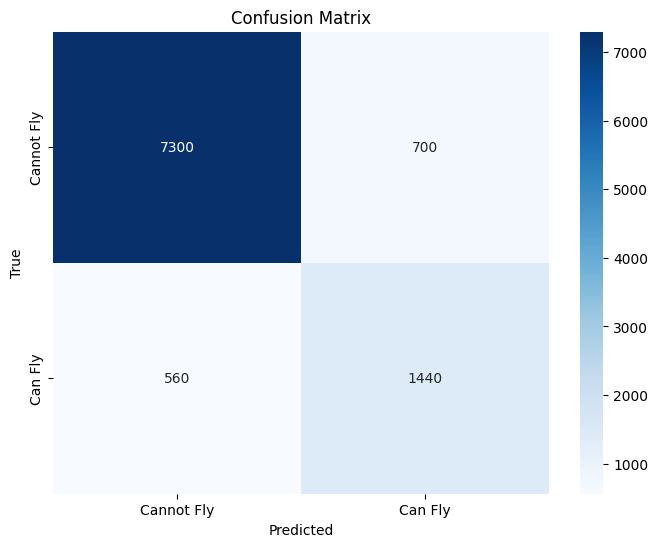

In [10]:
# Predict on the test set
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_bin, axis=1)

# Calculate evaluation metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Cannot Fly', 'Can Fly'], yticklabels=['Cannot Fly', 'Can Fly'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


This code evaluates the performance of the trained CNN model on the test set by predicting the labels and calculating various evaluation metrics. It also visualizes the performance using a confusion matrix.

Prediction on Test Set: The model predicts the class probabilities for the test set, which are then converted to class labels.
Evaluation Metrics: The precision, recall, F1 score, and accuracy are calculated to assess the model's performance on the test set.
Confusion Matrix: A confusion matrix is generated and visualized using a heatmap to show the distribution of true vs. predicted labels, providing insight into the model's classification performance.